### 변동성 돌파 전략
- ETF 종목 많이 사용
- 변동폭 = 전일고가 - 전일저가 -> 목표가 = 당일 시가 +(변동폭 * K)

In [6]:
from pykrx import stock

In [ ]:
df_kosdaq_150 = stock.get_market_ohlcv_by_date('20101001', '20241230', '229200')

In [ ]:
# 변동폭 컬럼 계산추가
df_kosdaq_150['변동폭'] = df_kosdaq_150['고가'] - df_kosdaq_150['저가']

In [9]:
df_kosdaq_150.columns

Index(['시가', '고가', '저가', '종가', '거래량', '등락률', '변동폭'], dtype='object')

In [11]:
# 전일 변동폭과 컬럼 shift 를 이용해 맞춤
df_kosdaq_150['전일변동폭'] = df_kosdaq_150['변동폭'].shift(periods=1)
df_kosdaq_150.head(4)

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭
날짜,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0


In [13]:
# 목표가 계산하여 컬럼추가
df_kosdaq_150['목표가'] = df_kosdaq_150['시가'] + (df_kosdaq_150['전일변동폭'] * 0.5)
df_kosdaq_150.head()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가
날짜,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0,10168.5
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0,10267.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0,10275.5
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147,102.0,10145.0


In [14]:
# 그날의 보유수익률
df_kosdaq_150['종가'] / df_kosdaq_150['목표가']

날짜
2015-10-01         NaN
2015-10-02    0.997984
2015-10-05    0.996494
2015-10-06    0.990317
2015-10-07    0.980680
                ...   
2024-12-20    0.969095
2024-12-23    0.989357
2024-12-24    0.989205
2024-12-26    0.983506
2024-12-27    0.979773
Length: 2272, dtype: float64

In [15]:
conditions = df_kosdaq_150['고가'] >= df_kosdaq_150['목표가'] # 매수 조건

In [18]:
import numpy as np
# df_kosdaq_150['수익률'] = np.where = (conditions, df_kosdaq_150['종가'] / df_kosdaq_150['목표가'], 1)
df_kosdaq_150['수익률'] = np.where(conditions, df_kosdaq_150['종가'] / df_kosdaq_150['목표가'], 1)
df_kosdaq_150.head()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가,수익률
날짜,,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN,1.0
2015-10-02,10135,10159,10135,10148,63224,0.465300,24,67.0,10168.5,1.0
2015-10-05,10255,10265,10210,10231,43154,0.817895,55,24.0,10267.0,1.0
2015-10-06,10248,10274,10172,10176,42399,-0.537582,102,55.0,10275.5,1.0
2015-10-07,10094,10094,9947,9949,21324,-2.230739,147,102.0,10145.0,1.0


In [20]:
df_kosdaq_150['누적수익률'] = df_kosdaq_150['수익률'].cumprod()

In [21]:
df_kosdaq_150.tail()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가,수익률,누적수익률
날짜,,,,,,,,,,,
2024-12-20,11235,11255,10925,10975,9686866,-2.401067,330,180.0,11325.0,1.000000,2.774530
2024-12-23,11110,11285,11000,11155,14527835,1.640091,285,330.0,11275.0,0.989357,2.745001
2024-12-24,11205,11270,11135,11225,6202421,0.627521,135,285.0,11347.5,1.000000,2.745001
2024-12-26,11300,11300,11135,11180,8372497,-0.400891,165,135.0,11367.5,1.000000,2.745001
2024-12-27,11165,11260,10970,11020,3708508,-1.431127,290,165.0,11247.5,0.979773,2.689479


#### 누적 수익률 이용한 CAGR 

In [22]:
delta_days = df_kosdaq_150.index[-1] - df_kosdaq_150.index[0]
delta_days.days

3375

In [26]:
year = delta_days.days / 365
year

9.246575342465754

In [28]:
# CAGR
CAGR = df_kosdaq_150['누적수익률'].iloc[-1] ** (1/year) - 1
CAGR * 100 # 단순 보유율 비교필요 그래야 전략이 맞는지 안맞는지 알 수 있음

11.292989708612744

#### 전략 적용 vs 단순 보유

In [29]:
import matplotlib.pyplot as plt

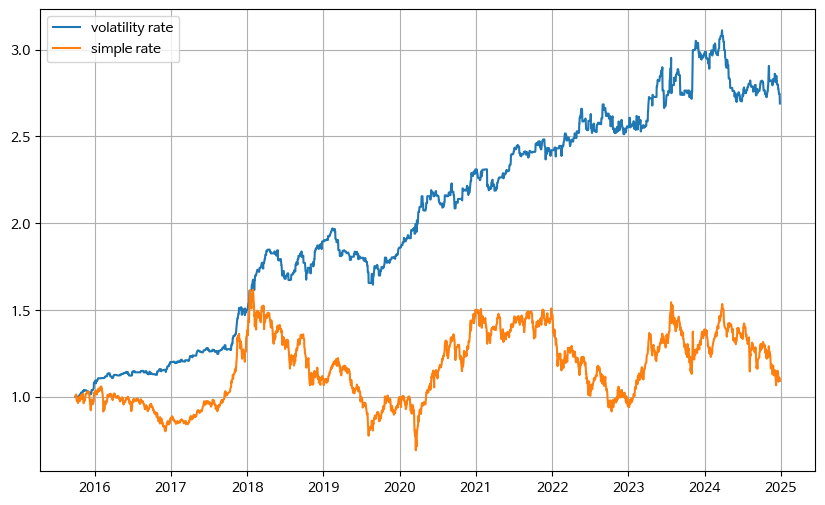

In [34]:
plt.figure(figsize= (10,6))
# 변동성 돌파 전략
plt.plot(df_kosdaq_150['누적수익률'], label='volatility rate')

# 단순 보유
plt.plot(df_kosdaq_150['종가'] / df_kosdaq_150['종가'].iloc[0], label='simple rate')

plt.grid() # 옵션으로 사용하면 그래프에 네모칸 선이 생김
plt.legend()
plt.show()